# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [1]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.3f' % x)
path_dataset = 'dataset/datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)

In [2]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))

El dataset que vamos a trabajar aquí tiene 6376 observaciones


In [3]:
df.head()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [4]:
X = df.drop(['price_aprox_usd'], axis=1)
y = df['price_aprox_usd']

# Realizá la separación a continuación en esta celda
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 

Para poder obtener el **RMSE** vamos a medir el `mean_squared_error` y obtener su raíz cuadrada. 

**Importá** `DecisionTreeRegressor` desde `sklearn.tree`.  

A continuación **entrená** el regresor con el conjunto de training


In [5]:
# En esta celda cargá el regresor y realizá el entrenamiento
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train,y_train)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizá la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [6]:
# Acá realizá la predicción
y_pred =  tree_reg.predict(X_test)

**Calculá el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [7]:
# En esta celda calculá el rmse
tree_msd = mean_squared_error(y_test, y_pred)

In [8]:
import numpy as np
error= np.sqrt(tree_msd)
print("el error RMSE: ", error)

el error RMSE:  25926.30990195806


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iterá** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [9]:
rmses_train = []
rmses_test = []

In [10]:
for i in np.arange(1,20,5):
    tree_reg = DecisionTreeRegressor(max_depth=i)
    model = tree_reg.fit(X_train,y_train)
    ypredtrain = model.predict(X_train)
    ypred = model.predict(X_test)
    
    rmses_train.append(np.sqrt(mean_squared_error(y_train, ypredtrain)))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, ypred)))
    

In [11]:
rmses_train

[26641.500635483615, 20249.703665268826, 14586.351968582818, 6643.529209052804]

In [12]:
rmses_test

[26990.023789934505,
 21798.802151011158,
 22307.954635529808,
 25283.866439473873]

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

Text(0.5, 1.0, 'RMSE Training vs RMSE Testing para árboles de decisión')

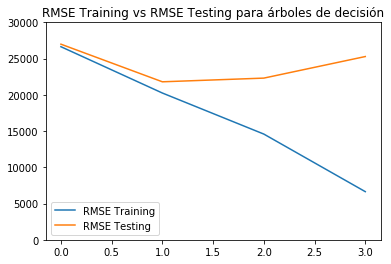

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(rmses_train, label='RMSE Training')
plt.plot(rmses_test, label='RMSE Testing')
plt.ylim((0,30000))
plt.legend(loc="best")
#plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
#plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")


Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [14]:
# Realizá el entrenamiento y el cálculo de rmse en esta celda
from sklearn.neighbors import KNeighborsRegressor
neigh = KNeighborsRegressor(n_neighbors=2)
neigh.fit(X_train, y_train) 


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                    weights='uniform')

In [15]:
y_pred =  neigh.predict(X_test)
knn_msd = mean_squared_error(y_test, y_pred)
error= np.sqrt(knn_msd)
print("el error RMSE: ", error)

el error RMSE:  25217.567988347095


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [16]:
# Calculá los cambio en el rmse en esta celda
rmses_train=[]
rmses_test=[]


for i in np.arange(1,20,1):
    neigh = KNeighborsRegressor(n_neighbors=i)
    model = neigh.fit(X_train,y_train)
    ypredtrain = model.predict(X_train)
    ypred = model.predict(X_test)
    
    rmses_train.append(np.sqrt(mean_squared_error(y_train, ypredtrain)))
    rmses_test.append(np.sqrt(mean_squared_error(y_test, ypred)))


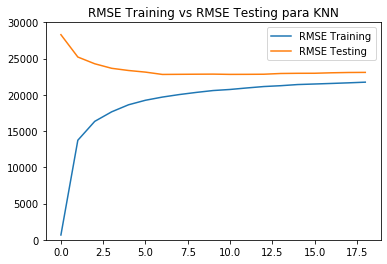

In [17]:
plt.plot(rmses_train, label='RMSE Training')
plt.plot(rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [18]:
regressor = DecisionTreeRegressor()


In [19]:
from sklearn.model_selection  import  cross_val_score

In [20]:
# Calculá en esta celda los cross_val_score

score = cross_val_score(regressor, X_train, y_train, scoring='neg_mean_squared_error',  cv=10)
rmse_score = np.sqrt(-score)
print(rmse_score)
print(rmse_score.mean())

[26827.00946107 25860.81338721 24394.58923506 26620.2596205
 24440.88571813 24517.44537505 24917.64892062 25244.16042907
 26481.1413626  28372.97116048]
25767.69246697909


Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [21]:
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
val_real = pd.Series(y_test.values)
val_pred = pd.Series(y_pred)

In [22]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [23]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,129000.000,110000.000,19000.000
1,174000.000,175000.000,1000.000
2,115000.000,99000.000,16000.000
3,87000.000,128000.000,41000.000
4,118000.000,140000.000,22000.000
5,140000.000,115000.000,25000.000
6,93500.000,97000.000,3500.000
7,160000.000,148000.000,12000.000
8,135000.000,130000.000,5000.000
9,85000.000,75000.000,10000.000
